In [28]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Чтение матрицы расстояний из файла
def read_distance_matrix(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        distance_matrix = []
        for line in lines:
            row = list(map(int, line.strip().split()))
            distance_matrix.append(row)
    return np.array(distance_matrix)

In [30]:
distance_matrix = read_distance_matrix('matrix.txt')

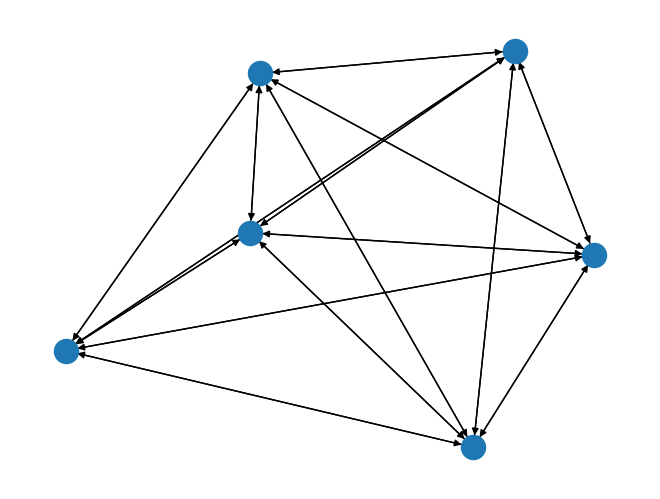

In [31]:
G =nx.DiGraph(distance_matrix)
nx.draw(G)

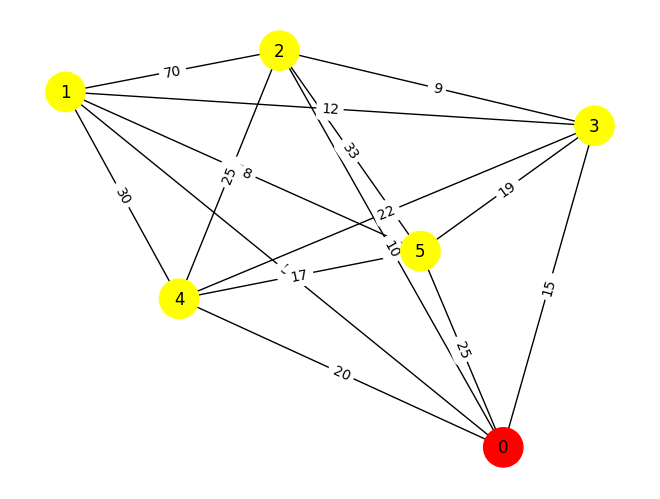

In [36]:
distance_matrix = read_distance_matrix('matrix.txt')
G = nx.Graph(distance_matrix)

# Пометка нулевой вершины красным цветом
node_colors = ['red' if node == 0 else 'yellow' for node in G.nodes]

# Рисование графа с подписями к ребрам
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=800)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [16]:
G = nx.DiGraph()

# Добавление вершин графа
num_vertices = len(distance_matrix)
G.add_nodes_from(range(num_vertices))

# Добавление ребер графа с атрибутом "weight"
for i in range(num_vertices):
    for j in range(num_vertices):
        weight = distance_matrix[i, j]
        G.add_edge(i, j, weight=weight)

# Рисование графа с подписями к ребрам
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=800)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


NameError: name 'nx' is not defined

In [22]:
!pip3 install folium
import json
import folium


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [30]:
with open('data_1.json') as f:
    request = json.load(f)


In [31]:
request

{'capacity': 50,
 'time_left': 29591,
 'points': [{'position': [60.653592, 56.80659], 'priority': 0},
  {'position': [60.56020833, 56.777725], 'priority': 1800},
  {'position': [60.62232, 56.790455], 'priority': 1800},
  {'position': [60.51130167, 56.88283667], 'priority': 1800},
  {'position': [60.61689333, 56.80038833], 'priority': 1800},
  {'position': [60.61061667, 56.89014333], 'priority': 1800},
  {'position': [60.49646, 56.79544], 'priority': 1800},
  {'position': [60.52927833, 56.81409333], 'priority': 1800},
  {'position': [60.49990667, 56.80903833], 'priority': 1800},
  {'position': [60.63402833, 56.79810667], 'priority': 1800},
  {'position': [60.58548667, 56.90399833], 'priority': 1800},
  {'position': [60.61172167, 56.88802833], 'priority': 1800},
  {'position': [60.583245, 56.88882167], 'priority': 1800},
  {'position': [60.53526667, 56.78525667], 'priority': 1800},
  {'position': [60.63574667, 56.80208], 'priority': 1800},
  {'position': [60.57315667, 56.89229333], 'prio

In [36]:
map = folium.Map(location=[55.75222,37.61556], zoom_start = 10)

for point in request['points']:
    lat, lon = point['position']
    folium.Marker(location=[lat, lon], icon=folium.Icon(color = 'orange')).add_to(map)
map.save("map.html")